# Лабораторная работа №4 
## Вариант 3
Выполнил Федоров А.В.

In [13]:
import os
import cv2
import pandas as pd
from random import randint
import matplotlib.pyplot as plt

### Файл датасета, с которым я работаю:

In [14]:
file = "annotation_original.csv"

### Задание 1-2. Удаляю колонку "Relative path":

In [15]:
tmp = pd.read_csv(file, header=0)
df = tmp.drop(["Relative path"], axis=1)

### Задание 3. Для класса "cat" - метка "0", для класса "dog" - метка "1":

In [16]:
def new(row):
    """Функция возвращает метку класса"""
    if row["Class label"] == "cat":
        val = 0
    else:
        val = 1
    return val

df["mark"] = df.apply(new, axis=1)

### Задание 4-5. 

In [ ]:
def height(row):
    """Функция возвращает высоту изображения"""
    image = cv2.imread(row["Absolute path"])
    value = image.shape
    return value[0]
def width(row):
    """Функция возвращает ширину изображения"""
    image = cv2.imread(row["Absolute path"])
    value = image.shape
    return  value[1]
def depth(row):
    """Функция возвращает глубину изображения"""
    image = cv2.imread(row["Absolute path"])
    value = image.shape
    return value[2]
df["height"] = df.apply(height, axis=1)
df["width"] = df.apply(width, axis=1)
df["depth"] = df.apply(depth, axis=1)
df.describe()

### Задание 6.

In [ ]:
def filter_dataframe(dataframe, label: int):
    """Функция принимает метку класса и возвращает сортированный DataFrame"""
    copy_dataframe = dataframe[dataframe.mark == label]
    return copy_dataframe
filter_dataframe(df, 1)

### Задание 7. Пусть длина = 1920, высота = 1080, класс = "cat"

In [ ]:
def max_dataframe(df, label: int, max_width: int, max_height: int):
    """Функция принимает метку класса, максимальную ширину, максимальную высоту и возвращает сортированный DataFrame"""
    max_df = df[(df.mark == label) & (df.width <= max_width) & (df.height <= max_height)]
    return max_df
max_w = 1920
max_h = 1080
class_label = 0
print(max_dataframe(df, class_label, max_w, max_h))

### Задание 8.

In [ ]:
df["pixels"] = df["height"] * df["width"] * df["depth"]
result = df.groupby("mark").agg({"pixels": ["mean", "min", "max"]})

### Задание 9.

In [ ]:
def histogram(dataframe, label: int):
    """Функция принимает метку класса и возвращает массивы каналов"""
    array1 = []
    array2 = []
    array3 = []
    label_df = filter_dataframe(dataframe, label)
    for i in label_df.index:
        image = cv2.imread(label_df["Absolute path"].loc[label_df.index[i]])
        array1.append(cv2.calcHist([image], [0], None, [256], [0, 256]))
        array2.append(cv2.calcHist([image], [1], None, [256], [0, 256]))
        array3.append(cv2.calcHist([image], [2], None, [256], [0, 256]))
    return array1, array2, array3
array1, array2, array3 = histogram(df, 0)


### Задание 10.

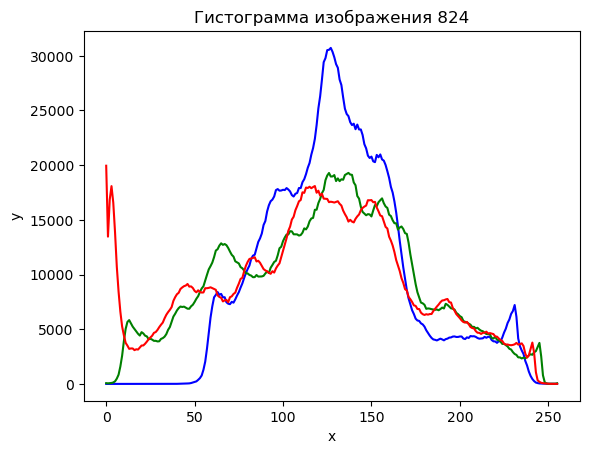

In [ ]:
i = randint(0, 1052)
a = str(i)
plt.ylabel('y')
plt.xlabel('x')
plt.plot(array1[i], color="b")
plt.plot(array2[i], color="g")
plt.plot(array3[i], color="r")
plt.title("Гистограмма изображения " + a)
plt.show()